In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


#### 任务分发控制，数据清洗，爬取策略，反扒，分析前端渲染过程，验证码突破，分布式数据一致性，代理策略，大数据存储

### 导入包和加载数据

In [8]:
#-*- encoding:utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud#词云包
import jieba
import numpy
# 图形风格
plt.style.use('ggplot')

In [2]:
props = pd.read_csv('/usr/my/test/lianjia_sh.csv')

### 浏览数据

In [3]:
props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 21 columns):
href                 1412 non-null object
title                1412 non-null object
compound             1412 non-null object
layout               1412 non-null object
gross_floor_area     1412 non-null int64
distribute           1412 non-null object
road                 1412 non-null object
floor                1412 non-null object
orientation          788 non-null object
rent_per_month       1412 non-null int64
added_at             1412 non-null object
total_views          1412 non-null int64
subway_line          1412 non-null object
subway_station       1412 non-null object
subway_distance      1412 non-null object
number               1411 non-null object
address              1360 non-null object
latest_week_views    1360 non-null object
room_type            0 non-null float64
img_url              1352 non-null object
captured_at          1411 non-null object
dtypes: float64(1

In [4]:
props.head()

,href,title,compound,layout,gross_floor_area,distribute,road,floor,orientation,rent_per_month,...,total_views,subway_line,subway_station,subway_distance,number,address,latest_week_views,room_type,img_url,captured_at
0,http://sh.lianjia.com/zufang/shz4138187.html,黎明花园，精致户型，有钥匙房源，光线充足,黎明花园,2室1厅,69,闵行,七宝,中区/6层,朝南,4500,...,24,9,七宝,923,shz4138187,七莘路2465弄30支弄,3,NaN,http://cdn1.dooioo.com/fetch/vp/fy/gi/20170922...,2017-10-07 18:03:47
1,http://sh.lianjia.com/zufang/shz4136323.html,温馨一室，高清大图，交通便利，钥匙在店,淡水湾花园,1室1厅,54,黄浦,新天地,中区/29层,朝南,10000,...,28,9,马当路,213,shz4136323,马当路588弄,5,NaN,http://cdn1.dooioo.com/fetch/vp/fy/gi/20170805...,2017-10-07 18:03:48
2,http://sh.lianjia.com/zufang/shz4139301.html,思南路115弄，实地看房，2室0厅1卫，高清大图,思南路115弄,2室0厅,38,黄浦,打浦桥,中区/7层,朝东,6800,...,18,9,打浦桥,360,shz4139301,思南路115弄,3,NaN,http://cdn1.dooioo.com/fetch/vp/fy/gi/20160329...,2017-10-07 18:03:49
3,http://sh.lianjia.com/zufang/shz4136314.html,采光棒，链家好房，高清大图，两室户,柳营路629弄,2室1厅,51,闸北,大宁,高区/6层,NaN,4500,...,18,1,中山北路,684,shz4136314,柳营路629弄,3,NaN,http://cdn1.dooioo.com/fetch/vp/fy/gi/20170806...,2017-10-07 18:03:49
4,http://sh.lianjia.com/zufang/shz4135512.html,新凯家园，附近有地铁，好房好心情，两室户,新凯家园,2室2厅,78,松江,泗泾,中区/5层,NaN,3600,...,40,9,佘山,426,shz4135512,"新家园路128弄, 新家园路30弄，新家园路88弄，古楼公路1858弄",8,NaN,http://cdn1.dooioo.com/fetch/vp/fy/gi/20160112...,2017-10-07 18:03:50


info浏览数据概要信息,gross_floor_area	rent_per_month	total_views为整数类型，其他都为字符串类型

### 清洗数据
删除一些不需要的数据

In [3]:
props.drop('room_type',axis=1, inplace=True)
props.drop('href',axis=1, inplace=True)
props.drop('img_url',axis=1, inplace=True)
props.drop('captured_at',axis=1, inplace=True)

In [6]:
props.head()

,title,compound,layout,gross_floor_area,distribute,road,floor,orientation,rent_per_month,added_at,total_views,subway_line,subway_station,subway_distance,number,address,latest_week_views
0,黎明花园，精致户型，有钥匙房源，光线充足,黎明花园,2室1厅,69,闵行,七宝,中区/6层,朝南,4500,2017.08.05,24,9,七宝,923,shz4138187,七莘路2465弄30支弄,3
1,温馨一室，高清大图，交通便利，钥匙在店,淡水湾花园,1室1厅,54,黄浦,新天地,中区/29层,朝南,10000,2017.08.04,28,9,马当路,213,shz4136323,马当路588弄,5
2,思南路115弄，实地看房，2室0厅1卫，高清大图,思南路115弄,2室0厅,38,黄浦,打浦桥,中区/7层,朝东,6800,2017.08.05,18,9,打浦桥,360,shz4139301,思南路115弄,3
3,采光棒，链家好房，高清大图，两室户,柳营路629弄,2室1厅,51,闸北,大宁,高区/6层,NaN,4500,2017.08.04,18,1,中山北路,684,shz4136314,柳营路629弄,3
4,新凯家园，附近有地铁，好房好心情，两室户,新凯家园,2室2厅,78,松江,泗泾,中区/5层,NaN,3600,2017.08.03,40,9,佘山,426,shz4135512,"新家园路128弄, 新家园路30弄，新家园路88弄，古楼公路1858弄",8


### 数据分析

In [7]:
props.describe()

,gross_floor_area,rent_per_month,total_views
count,1412.000000,1412.000000,1412.000000
mean,78.893059,7782.723796,10.381728
std,43.724581,7161.425923,7.255744
min,19.000000,1700.000000,0.000000
25%,48.000000,4500.000000,5.000000
50%,69.000000,6000.000000,8.000000
75%,102.000000,9000.000000,13.000000
max,740.000000,180000.000000,60.000000


In [ ]:
描述性统计分析，每个月平均租金是将近7800,有点吓人，平均有10次看过仿房子，面积平均79平米，唉！有点不想说什么了

#### distribute
租房地区分析

In [8]:
props.distribute.value_counts()

浦东    381
徐汇    201
闵行    152
长宁    103
普陀     99
黄浦     93
杨浦     85
闸北     65
宝山     60
静安     53
虹口     49
松江     43
嘉定     17
青浦     11
Name: distribute, dtype: int64

In [4]:
from matplotlib.font_manager import FontProperties
font_zh = FontProperties(fname="/usr/my/font/simhei.ttf")
sns.set(font=font_zh.get_name())

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


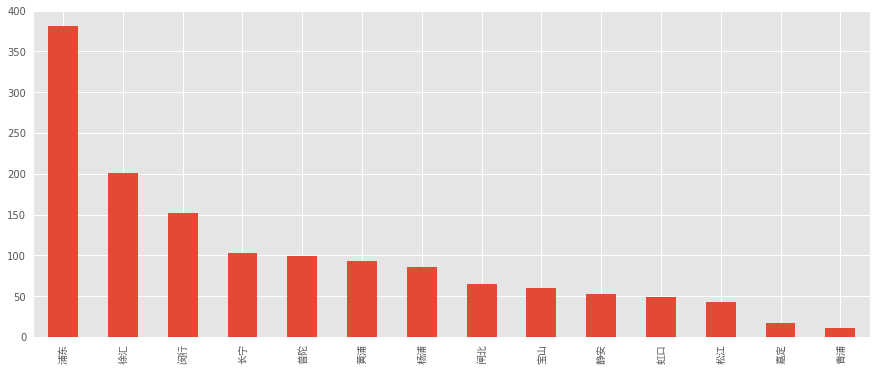

In [41]:
ax = props.distribute.value_counts().plot.bar(figsize=(15,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
plt.show()

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


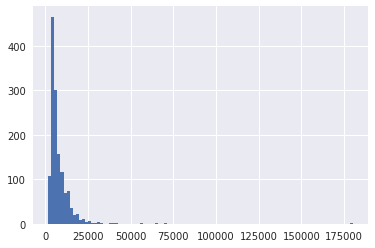

In [21]:
props.rent_per_month.hist(bins=100)

In [ ]:
租房主要分布在浦东，徐汇，闵行，长宁地区较多

#### 地铁站

In [16]:
props.subway_station.value_counts()

商城路         28
世纪大道        27
徐家汇         26
杨高中路        22
蓝村路         20
宜山路         20
中潭路         19
上海体育馆       18
中山公园        18
上海体育场       16
桂林路         16
三林东         16
合川路         16
龙阳路         15
漕宝路         15
上海儿童医学中心    15
松江大学城       15
鲁班路         14
昌平路         14
南京西路        13
民生路         13
小南门         13
江宁路         13
虹桥路         13
西藏南路        13
金沙江路        12
共康路         12
打浦桥         12
娄山关路        12
肇嘉浜路        12
            ..
南陈路          1
曲阜路          1
外高桥保税区北      1
张华浜          1
五洲大道         1
复兴岛          1
徐盈路          1
黄陂南路         1
上南路          1
龙耀路          1
灵岩南路         1
高科西路         1
醉白池          1
宝山路          1
中国博览会北       1
友谊西路         1
富锦路          1
徐泾北城         1
三门路          1
南翔           1
宝杨路          1
淞滨路          1
大连路          1
嘉定西          1
石龙路          1
上大路          1
中兴路          1
城鸿路222弄      1
新闸路          1
港城路          1
Name: subway_station, Length: 234, dtype: int64

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


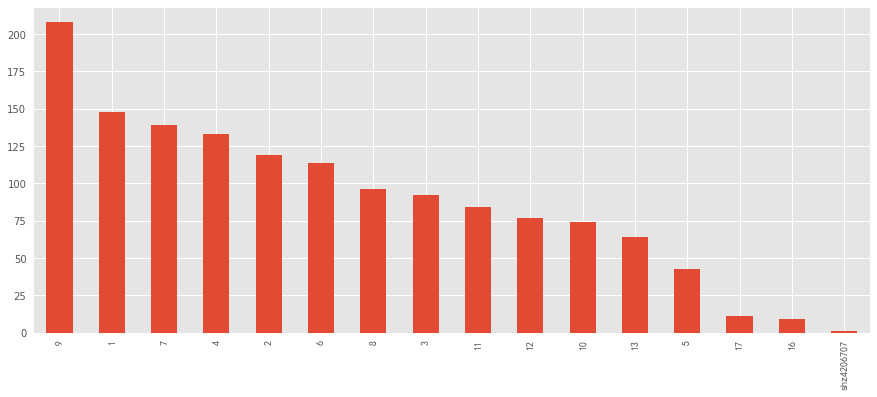

In [40]:
ax = props.subway_line.value_counts().plot.bar(figsize=(15,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

In [ ]:
大多数租房离9号线非常近，总体交通很方便，

#### 朝向

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


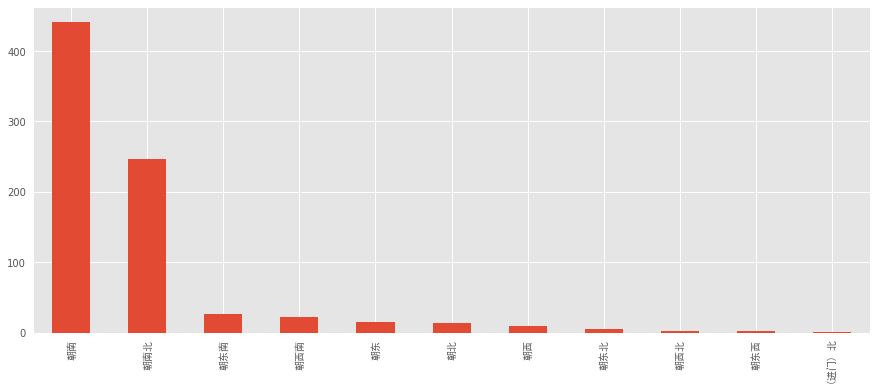

In [39]:
ax = props.orientation.value_counts().plot.bar(figsize=(15,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

In [ ]:
基本大多是朝南

#### 月租
月租是租房者最为关注的信息

In [27]:
props.groupby('distribute').total_views.value_counts().unstack()

total_views,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,45,46,53,60
distribute,,,,,,,,,,,,,,,,,,,,,
嘉定,NaN,NaN,NaN,3.0,1.0,3.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
宝山,NaN,NaN,1.0,6.0,6.0,6.0,7.0,7.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
徐汇,2.0,NaN,3.0,14.0,10.0,18.0,12.0,13.0,15.0,12.0,...,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
普陀,1.0,1.0,1.0,12.0,6.0,11.0,10.0,3.0,5.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
杨浦,NaN,NaN,1.0,9.0,7.0,6.0,10.0,7.0,5.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
松江,NaN,NaN,NaN,1.0,3.0,2.0,2.0,3.0,4.0,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
浦东,NaN,3.0,3.0,30.0,27.0,37.0,29.0,24.0,31.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
虹口,NaN,NaN,1.0,2.0,9.0,2.0,4.0,5.0,5.0,2.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
长宁,1.0,1.0,1.0,5.0,12.0,7.0,6.0,11.0,14.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


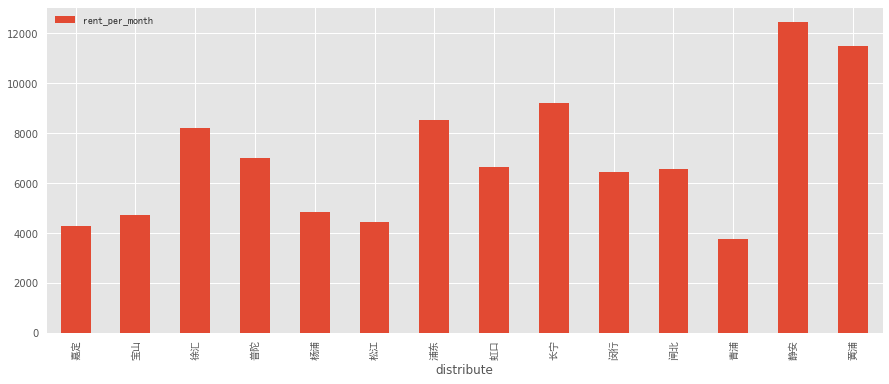

In [36]:
ax = props.groupby(['distribute']).rent_per_month.mean().plot.bar(figsize=(15,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.legend(prop=font_zh)   

In [ ]:
静安和南浦的平均月租较高，浦东，虹口和徐汇长宁次之。

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


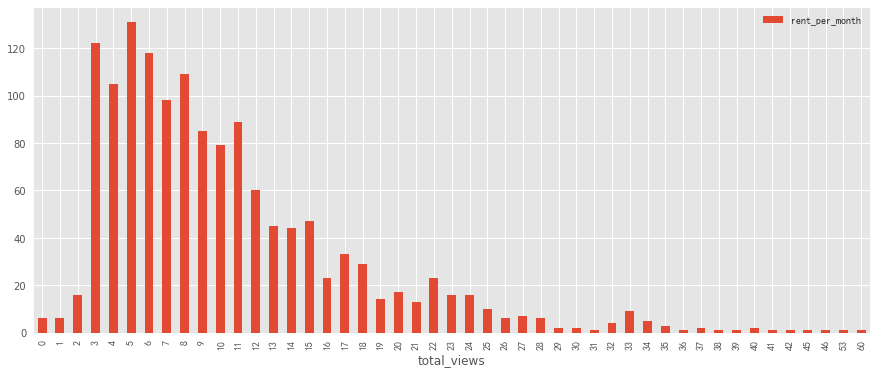

In [38]:
ax = props.groupby(['total_views']).rent_per_month.count().plot.bar(figsize=(15,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.legend(prop=font_zh) 

大多数房源查看次数在3-12次

In [ ]:
ax = props.groupby(['total_views']).rent_per_month.mean().plot.bar(figsize=(15,6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)
ax.legend(prop=font_zh) 

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


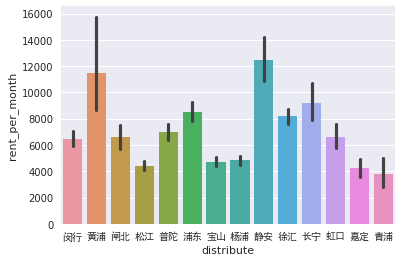

In [14]:
ax = sns.barplot('distribute', 'rent_per_month', data=props)
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)


In [ ]:
黄埔，静安，徐汇和长宁的房子都相对较贵，都超过了8000

#### 更新是时间

In [28]:
props.added_at.value_counts()

2017.09.24    36
2017.09.16    33
2017.09.18    32
2017.09.09    32
2017.09.10    31
2017.09.02    31
2017.09.17    30
2017.09.14    30
2017.09.03    27
2017.09.01    26
2017.09.23    26
2017.08.03    25
2017.09.25    24
2017.09.07    23
2017.09.06    23
2017.08.28    23
2017.09.13    22
2017.09.04    22
2017.09.12    22
2017.09.27    21
2017.09.22    20
2017.09.29    20
2017.08.02    19
2017.08.24    19
2017.08.05    19
2017.09.19    19
2017.09.15    18
2017.09.05    18
2017.08.29    18
2017.09.08    18
              ..
2017.04.09     1
2017.06.09     1
2017.03.13     1
2017.05.27     1
2017.04.07     1
2017.01.05     1
2017.05.21     1
2017.03.12     1
2017.06.14     1
2017.01.14     1
2017.02.24     1
2017.03.31     1
2017.02.04     1
2017.06.10     1
2017.06.06     1
2017.07.16     1
2017.07.01     1
2017.04.10     1
2017.07.02     1
2017.03.27     1
2017.06.13     1
2017.02.09     1
2017.06.04     1
2017.03.05     1
2017.04.03     1
2016.11.05     1
2017.01.17     1
2017.05.20    

时间上

#### title
词云展示

In [9]:
segs = jieba.cut(" ".join(props.title))
segments = [seg for seg in segs if not seg==' ' and not seg=='，']
len(segments)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 2.607 seconds.
Prefix dict has been built succesfully.


13985

In [10]:
words_df=pd.DataFrame({'segment':segments})
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"], ascending=False)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [13]:
wordcloud=WordCloud(font_path="/usr/my/font/simhei.ttf",background_color="white")

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


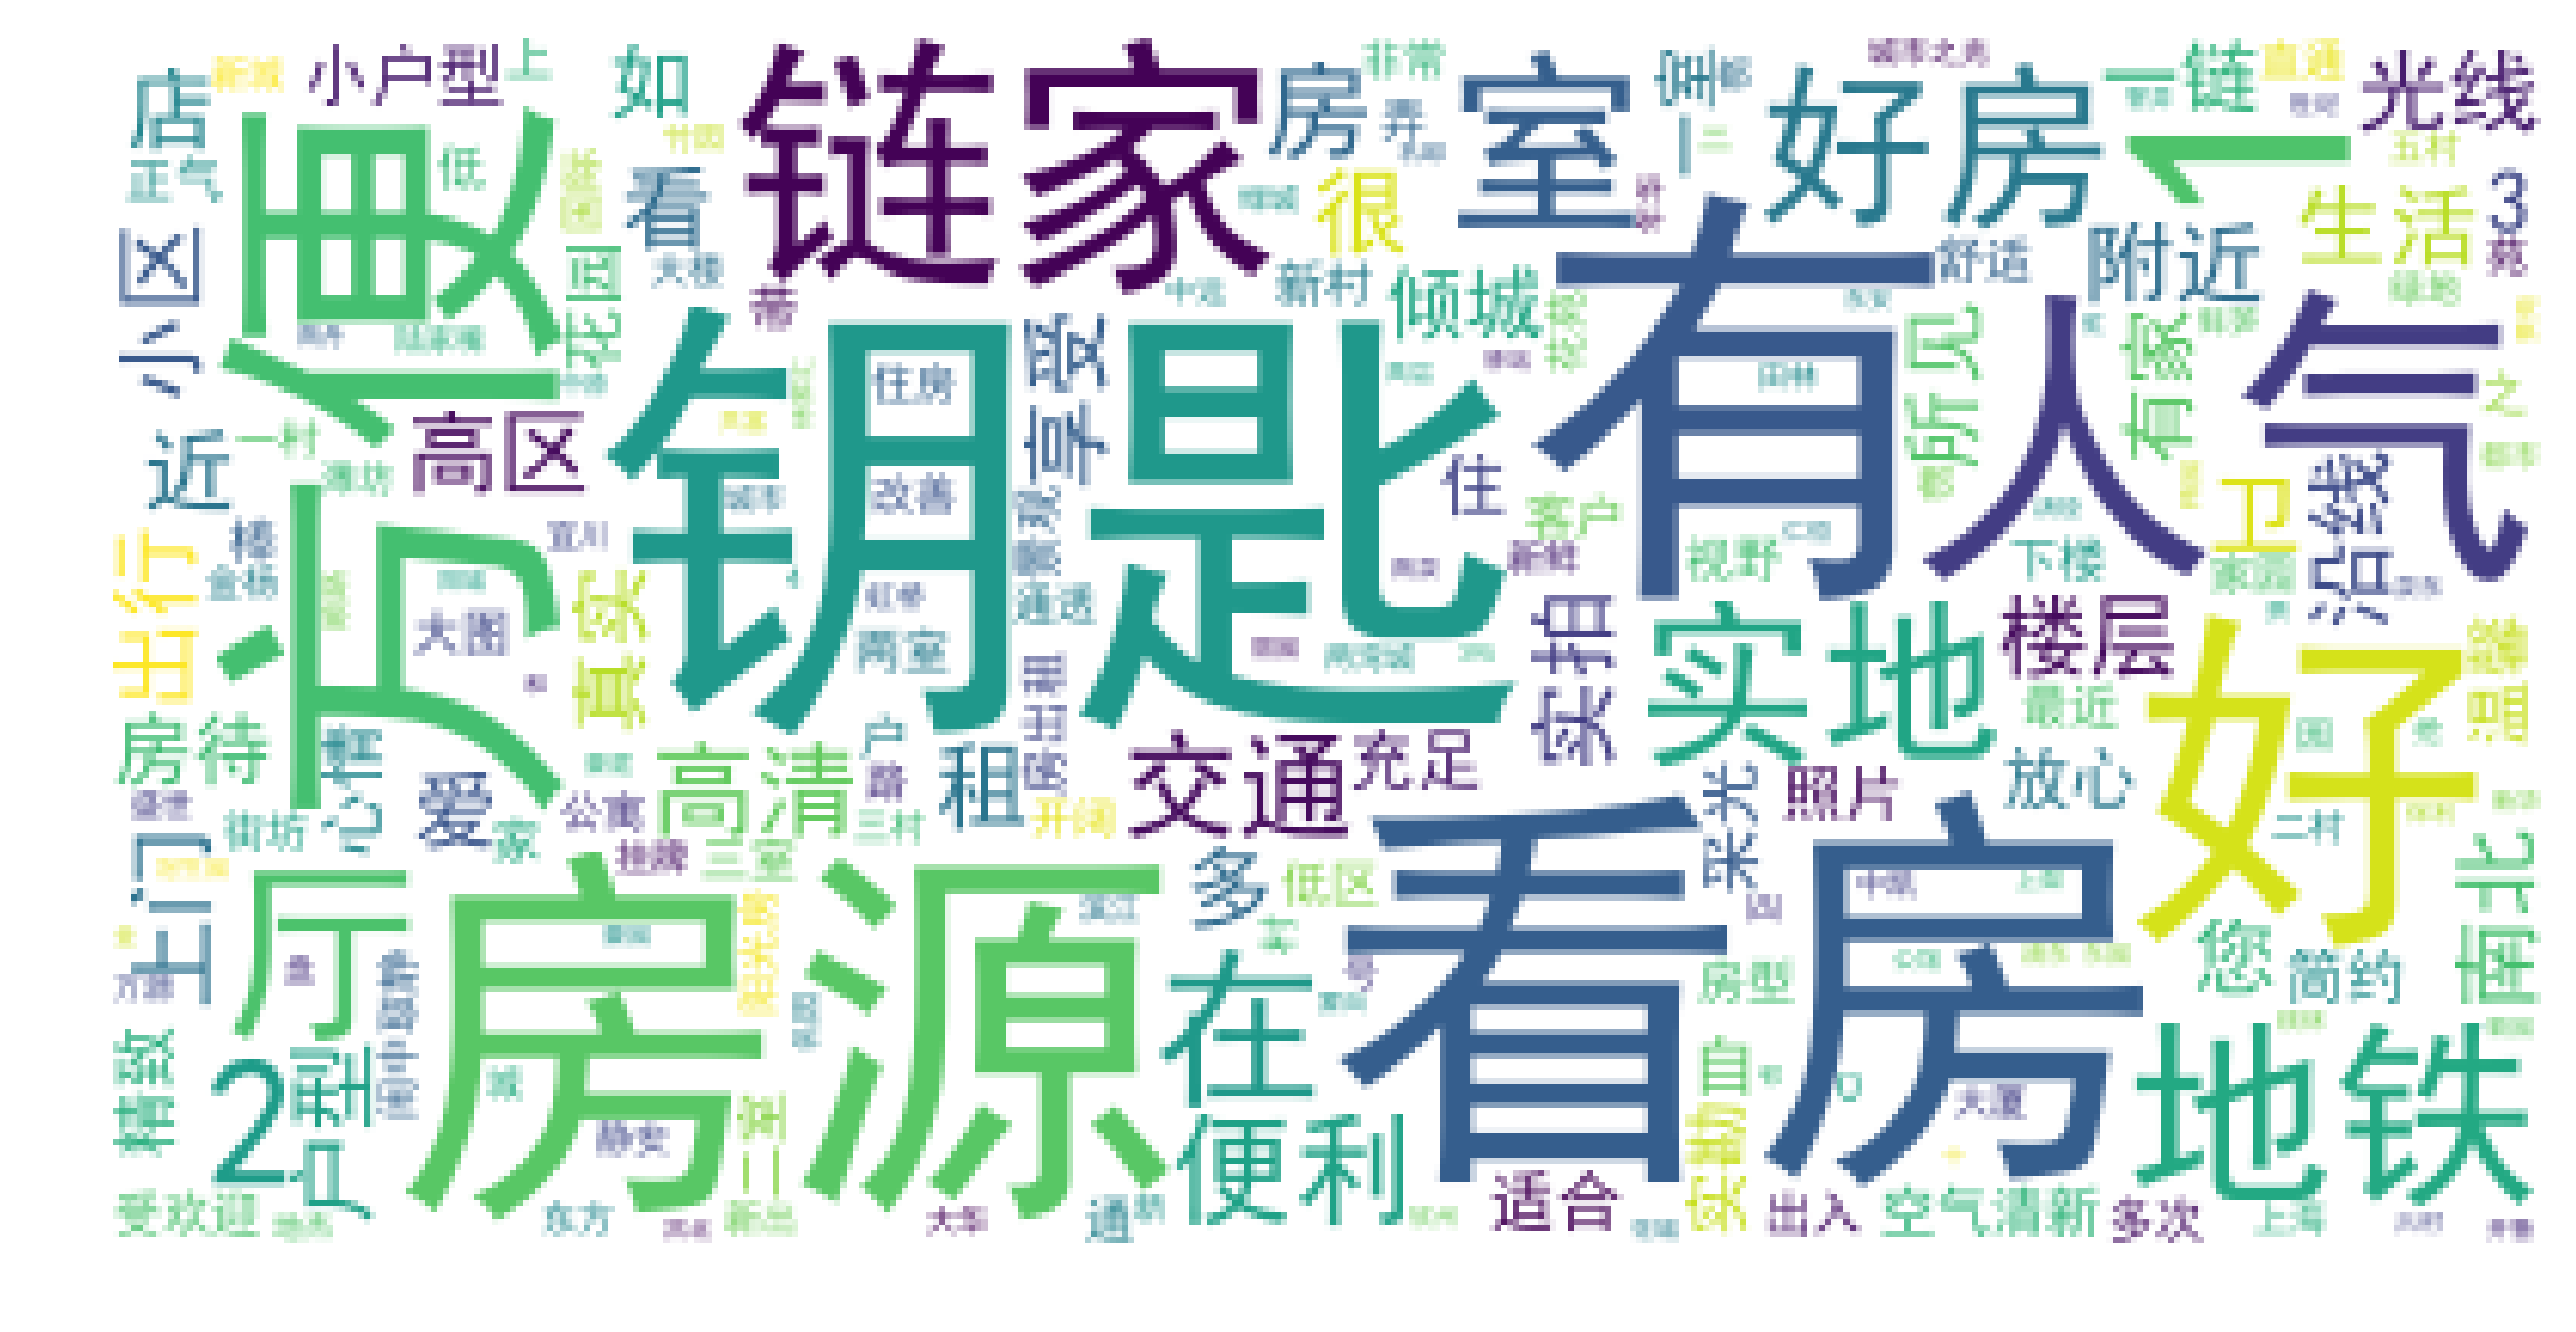

In [14]:
words = words_stat.set_index('segment').to_dict()
wordcloud = wordcloud.fit_words(words['计数'])
plt.figure(
    num=None, figsize=(15, 7),
    dpi=500, facecolor='w', edgecolor='k'
)

plt.axis("off")
plt.imshow(wordcloud)
plt.show()